# PCA - Principal Component Analysis


---- Without Dimensionality Reduction ----
Accuracy on test set :  0.9210526315789473

---- With Dimensionality Reduction (PCA) ----
Accuracy on test set :  0.9210526315789473

Eigen Values : 
[13.30499079  5.7013746   2.82291016  1.98412752  1.65163324  1.20948224]

Variances (Percentage) : 
[44.27202561 18.97118204  9.39316326  6.60213492  5.49576849  4.02452204]

Eigen Vectors : 
[[ 2.18902444e-01  1.03724578e-01  2.27537293e-01  2.20994985e-01
   1.42589694e-01  2.39285354e-01  2.58400481e-01  2.60853758e-01
   1.38166959e-01  6.43633464e-02  2.05978776e-01  1.74280281e-02
   2.11325916e-01  2.02869635e-01  1.45314521e-02  1.70393451e-01
   1.53589790e-01  1.83417397e-01  4.24984216e-02  1.02568322e-01
   2.27996634e-01  1.04469325e-01  2.36639681e-01  2.24870533e-01
   1.27952561e-01  2.10095880e-01  2.28767533e-01  2.50885971e-01
   1.22904556e-01  1.31783943e-01]
 [-2.33857132e-01 -5.97060883e-02 -2.15181361e-01 -2.31076711e-01
   1.86113023e-01  1.51891610e-01  6.01653628e-02 

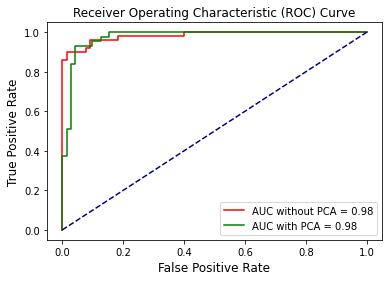

In [ ]:
import pandas as pd
import numpy as np

# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# The sharable Link
link = 'https://drive.google.com/file/d/1MBQ9zqolIxxmHeBPyUvnu0Kri909izv8'

# Get id from link
fluff, id = link.split('d/')
#print (id)

# Get File from Gdrive
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('breast_cancer.csv')

data = pd.read_csv('breast_cancer.csv')
data = data.sample(frac=1)
dataset = np.array(data)

X = dataset[:,2:32]
Y = dataset[:,1]

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y = le.fit_transform(Y)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =
0.20)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,Y_train)
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_predict)
print("\n---- Without Dimensionality Reduction ----")
print("Accuracy on test set : ", accuracy)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr1, tpr1, fpr2, tpr2):
  plt.plot(fpr1, tpr1, color='red', label = "AUC without PCA = %0.2f" % auc)
  plt.plot(fpr2, tpr2, color='green', label = "AUC with PCA = %0.2f" % auc_pca)
  plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
  plt.xlabel('False Positive Rate', fontsize=12)
  plt.ylabel('True Positive Rate', fontsize=12)
  plt.title('Receiver Operating Characteristic (ROC) Curve',
  fontsize=12)
  plt.legend()
  plt.show()

probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(Y_test, probs)
fpr1, tpr1, thresholds1 = roc_curve(Y_test, probs)

#Dimensionality reduction - Principal Component Analysis Algorithm
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(X_scaled)

transformed_df = pd.DataFrame(pca.transform(X_scaled),
columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
transformed_df = np.array(transformed_df)
pca_X_train, pca_X_test, pca_Y_train, pca_Y_test = train_test_split(transformed_df, Y, test_size = 0.20)

model = GaussianNB()
model.fit(pca_X_train, pca_Y_train)
pca_y_predict = model.predict(pca_X_test)
pca_accuracy = accuracy_score(pca_Y_test, pca_y_predict)

print("\n---- With Dimensionality Reduction (PCA) ----")
print("Accuracy on test set : ", pca_accuracy)

print("\nEigen Values : ")
print(pca.explained_variance_)
print()
print("Variances (Percentage) : ")
print(pca.explained_variance_ratio_ * 100)
print()
print("Eigen Vectors : ")
print(pca.components_)

probs_pca = model.predict_proba(pca_X_test)
probs_pca = probs_pca[:, 1]

auc_pca = roc_auc_score(pca_Y_test, probs_pca)
fpr2, tpr2, thresholds2 = roc_curve(pca_Y_test, probs_pca)
plot_roc_curve(fpr1, tpr1, fpr2, tpr2)